In [53]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np
from datetime import datetime

In [64]:
gold = 'GC=F'
year_10 = '^TNX'
silver = 'SIN21.CMX'
snp = '^GSPC'
nasdaq ='^IXIC'
vix = '^VIX'
dollar = 'DX=F'

In [55]:
stdscale = StandardScaler()

In [56]:
def scaled(x):
    x_index = x.index
    x_columns = x.columns
    x_scaled = stdscale.fit_transform(x)
    x_scaled = pd.DataFrame(x_scaled, index = x_index, columns=x_columns)
    return x_scaled

def mdd(x):
    x_max = x['Close'][0]
    x_min = x['Close'][0]
    mdd_list = []
    for i in range(1, len(x)):
        if x_max < x['Close'][i]:
            x_max = x['Close'][i]
        if x_max > x['Close'][i]:
            smdd1 = (x_max - x['Close'][i])/x_max*100
            mdd_list.append(smdd1)
    return max(mdd_list)

def sharp(x):
    df = income(x)
    return (df['income'][-1] - df['income'][0]) / np.std(df['income'])

def data(ticker, strdate,enddate = datetime.today()):
    return pdr.DataReader(ticker, 'yahoo', start= strdate, end=enddate)

def income(x):
    income = (x[-1]-x[0])/x[0]
    return income*100

def day_volatility(x):
    x_mdd = (x['High']-x['Low'])/x['Low']*100
    df = pd.DataFrame(x_mdd, columns = ['day_volatility'])
    return df

def day_income(x):
    a = []
    a.append(0)
    for i in range(0, len(x)-1):
        a.append((x['Close'][i+1] -  x['Close'][i])/x['Close'][i]*100)
        
    df = pd.DataFrame(a, columns=['day_income'], index = x.index)
    return df

def income(x):
    a = []
    a.append(0)
    for i in range(0, len(x)-1):
        a.append((x['Close'][i+1] -  x['Close'][0])/x['Close'][0]*100)
        
    df = pd.DataFrame(a, columns=['income'], index = x.index)
    return df
    
def describe(x, strdate, enddate = datetime.today()):
    desc = data(x, strdate, enddate)
    df = day_volatility(desc)
    df2 = day_income(desc)
    df3 = income(desc)
    df4 = pd.concat([desc,df,df2,df3],axis = 1)
    print('기간 mdd =', mdd(desc),'%')
    print('샤프지수 =',sharp(desc))
    print('일일 변동성 평균 =', np.mean([day_volatility(desc)]), '%')

    return df4

def graph(x):
    plt.plot(x['Close'], marker = 'o')

In [57]:
cooper = data('HG=F', '2021-05-01')
wti = data('CL=F','2021-05-01')
brent = data('BZ=F', '2021-05-01')
gas = data('NG=F','2021-05-01')
corn = data('ZC=F', '2021-05-01')
bean = data('ZS=F', '2021-05-01')

commodity = [cooper, wti, brent,gas,corn,bean]
commodity_name = ['cooper', 'wti', 'brent','gas','corn','bean']
com_scaled = []

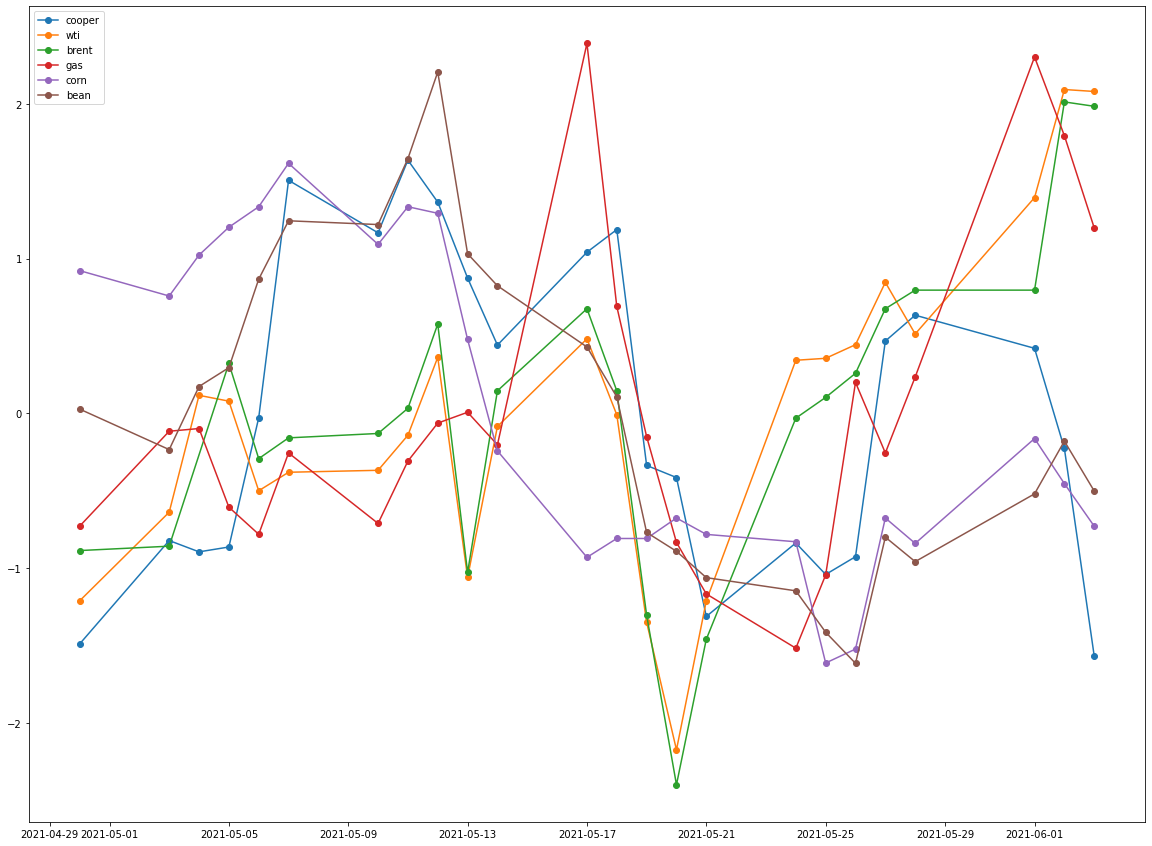

In [58]:
plt.figure(figsize=(20,15))
for i in range(0,len(commodity)):
    com_scaled.append(scaled(commodity[i]))
    graph(com_scaled[i])
plt.legend(commodity_name)



In [59]:
plt.figure(figsize=(15,10))
nasdaq = data('^IXIC', '2021-04-01')
graph(nasdaq['Close'])

KeyError: 'Close'

<Figure size 1080x720 with 0 Axes>

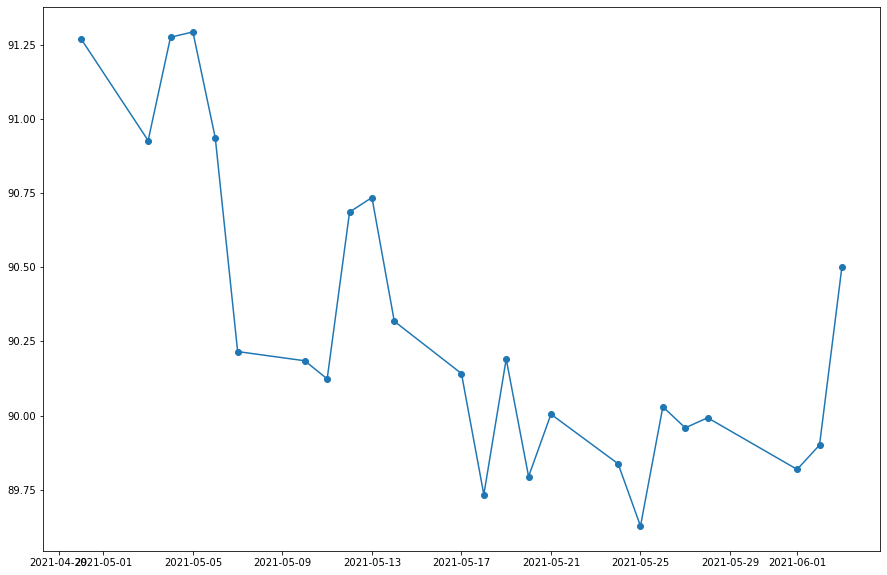

In [69]:
plt.figure(figsize=(15,10))
year_10_data = data(dollar, '2021-05-01')
graph(year_10_data)
